# SSP Spaces

This package includes SSPSpace (subtypes: RandomSSPSpace and HexgonalSSP), which defines an encoding to a high-dimensional Fourier space. RandomSSPSpace (with sampler='norm') is just defining Random Fourier Features, while HexgonalSSP define a structured, rather than random mapping. There is also a SPSpace for high-dimensional random encodings for discrete data. These classes all have methods for decoding, sampling, plotting, and binding (a method for composing embeddings). These are used by the SSP spaces.


pygame 2.4.0 (SDL 2.26.4, Python 3.10.0)
Hello from the pygame community. https://www.pygame.org/contribute.html


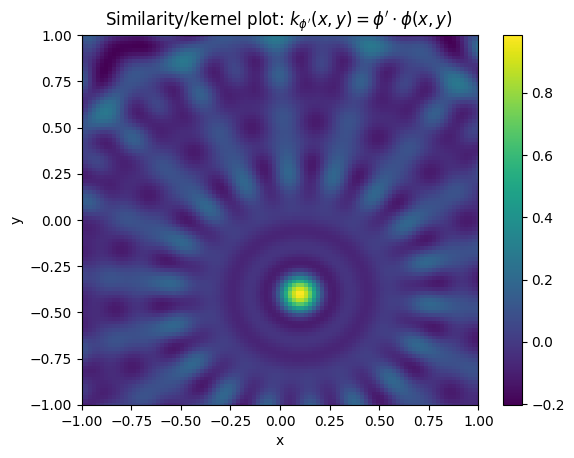

(x,y)=[ 0.1 -0.4]
SSP \phi(x,y)=[[-0.02039967 -0.03502012  0.02624718  0.06347138 -0.12448092 -0.09772352
  -0.17368525 -0.00950252 -0.0636231   0.07614481  0.0211399   0.11769203
  -0.0340933   0.00948353  0.11758286  0.23476207  0.09678782  0.05303844
  -0.06527949  0.03723633 -0.06346059  0.01848691  0.08285878 -0.11927728
   0.10028606  0.07250629 -0.0094899   0.02987377  0.0306166   0.00782066
  -0.01521379  0.00518103 -0.01435997 -0.00685415  0.03814917 -0.03309898
   0.03530438  0.00615532  0.00704359  0.05145639  0.022547   -0.02157883
  -0.01797024 -0.00304301 -0.00881049 -0.03153577  0.02957733 -0.06284849
  -0.01254832 -0.01012     0.03100112  0.1757274   0.09769029  0.00458662
  -0.0573555   0.09526872 -0.06612151  0.14895999  0.02212083 -0.00058513
   0.08160194 -0.0115668   0.03052775 -0.02221628 -0.05504051  0.05942131
  -0.06391567 -0.05112336  0.14866249  0.04512515 -0.04680761  0.01152421
   0.04202685 -0.04880616  0.01584073 -0.06919795  0.03757072  0.08125389
  -0.0

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os
sys.path.insert(1, os.path.dirname(os.getcwd()))
os.chdir("..")
import vsagym

# Create SSP space
domain_dim = 2 # The dim of the 'x' space
bounds = np.tile([-1,1],(domain_dim,1)) # bounds of x space (needed only for decoding, can set as None if you don't need to decode)
ssp_type = 'hex'
if ssp_type=='hex':
    ssp_space = vsagym.spaces.HexagonalSSPSpace(domain_dim,
                     n_scales=6,n_rotates=6, # You can change the dim of the SSP either via the ssp_dim arg or (in the case of hex ssps) n_scales and n_rotates. Try changing these to see what happens
                     domain_bounds=bounds, length_scale=0.1, scale_min=1) 
elif ssp_type=='rand':
    ssp_space = vsagym.spaces.RandomSSPSpace(domain_dim,
                     ssp_dim=151, domain_bounds=bounds, length_scale=0.1)

# For HexSSPs, only certain dims are allowed. If you make the space with an invalid ssp_dim arg, it will just round ssp_dim to the closest 'ok' one, so you might need to check the ssp_dim of the returned ssp_space
d = ssp_space.ssp_dim 

# Some random x
x = np.array([0.1,-0.4])
phi = ssp_space.encode(x)

plt.figure()
ax = plt.subplot(111)
im = ssp_space.similarity_plot(phi, ax=ax)
plt.colorbar(im)
plt.title("Similarity/kernel plot: $k_{\\phi'}(x,y) = \\phi'\cdot \\phi(x,y)$ ")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Let's try decoding
xhat = ssp_space.decode(phi, method='direct-optim') 
print(f"(x,y)={x}" )
print(f"SSP \phi(x,y)={phi}" )

print(f"Decoding error = {np.sqrt(np.sum((x-xhat)**2))}")

## SSP Gym Spaces


There are four gymnasium spaces included in this package. 
- SSPBox: SSPs encoding continuous data (i.e., from a gym.spaces.Box space). The underlying mapping (a SSPSpace object) will be automatically generated if not provided.
- SSPDiscrete: SPs encoding discete data (i.e., from a gym.spaces.Discrete space). The underlying mapping (a SPSpace object) will be automatically generated if not provided. (note that this is called SSPDiscrete rather than SPDiscrete to be consisent with the other spaces, this name may be changed in future versions of this package)
- SSPSequences: SSPs encoding seqewunces of continous or discrete data. Must be given a SSPBox or SSPDiscrete space
- SSPDict: A general purpose space for defining VSA/SSP style encoding and decoding schemes over multiple data types. This requries more set-up as shown in the examples later in this notebook 


In [21]:
# SSPBox

ssp_dim = 97
box_space = vsagym.spaces.SSPBox(-1, 1, 2, shape_out=ssp_dim, decoder_method='direct-optim', length_scale=0.1)
x = np.array([0.1, -0.3])
ssp = box_space.encode(x)


print(box_space.sample())
# box_space.samples(2)

[ 0.21761613 -0.09153611  0.09259584  0.15691867 -0.22761214 -0.03250423
  0.04159516  0.08531573 -0.13259052  0.1743979   0.03840705  0.1753406
  0.11420442 -0.00791551  0.0192621   0.01778317  0.0590999   0.11524159
 -0.0335388   0.13569619 -0.09291231  0.05084999  0.08881361  0.146692
 -0.0352093  -0.00505819 -0.07602431 -0.01046861  0.2097571   0.12645741
 -0.09441897 -0.0785854   0.07429642  0.11931379 -0.03576984  0.04762926
  0.08274284  0.00266645 -0.07950864  0.04182146 -0.10259917 -0.01000495
  0.06245586 -0.05912912 -0.09231053 -0.06353454  0.03227451  0.13584046
  0.06868859  0.07101526 -0.03677263  0.02221355 -0.08566079  0.07698927
  0.06272574  0.00787881  0.20779935  0.05653327 -0.06212656 -0.18146151
 -0.01751813 -0.11662856 -0.1059261  -0.05429151  0.03611527 -0.05881887
  0.04526845 -0.07885541  0.12905756 -0.10593441  0.13481207  0.10164592
 -0.00155497  0.30268747 -0.12909642 -0.0282824  -0.06643209  0.01764669
  0.04353395  0.0454439  -0.10392065  0.05792484 -0.09

In [22]:
# SSPDiscrete
discrete_space = vsagym.spaces.SSPDiscrete(3, shape_out=ssp_dim)
decoded_one = discrete_space.decode(discrete_space.encode(1))
print(discrete_space.sample())

[ 0.08378858 -0.05736333  0.00954869 -0.14852537  0.07542518  0.0201821
  0.06279468 -0.1266031   0.13491143  0.01386215 -0.0218396  -0.00819161
  0.03053197 -0.07007166  0.08770628  0.07640012 -0.15570585  0.07652685
 -0.06217325  0.0961399  -0.0314086  -0.15374525 -0.07790075 -0.04496824
 -0.02501263  0.04044713  0.06536213  0.05458695  0.10906667 -0.16038834
  0.02523968  0.1512016  -0.08975054 -0.15908249  0.14675643  0.09080307
 -0.00328633 -0.12107447 -0.03496771 -0.04190134  0.03945482  0.19550274
  0.23765013 -0.02689266  0.14090854 -0.089036   -0.06539693  0.12843162
 -0.10938022  0.08383843  0.02787728  0.18579613  0.1474271   0.02087535
  0.11279847 -0.05960414  0.11724852 -0.08525696  0.11849644  0.13589893
 -0.10176229  0.05808701  0.07334834 -0.03724251  0.10638212  0.00152468
 -0.06419328 -0.17380616  0.00494321 -0.11398786  0.04937127  0.00714278
  0.16991457 -0.02914698 -0.00764038 -0.18907969 -0.04438868  0.13648243
 -0.11431105 -0.05909341  0.00579984 -0.130322   -0.

In [15]:
decoded_one

In [24]:
ssp_dim=151
seq_space = vsagym.spaces.SSPSequence(
        vsagym.spaces.SSPBox(-1, 1, 2, shape_out=ssp_dim, decoder_method='direct-optim', length_scale=0.1),
        length=3)
seq = np.array([[0.1, -0.3], [0, -0.1], [-0.2, 0.5]])
print(seq_space.decode(seq_space.encode(seq.reshape(-1))))
seq_space.sample()

[[ 0.09733415 -0.2909039 ]
 [-0.00170867 -0.09836373]
 [-0.19455224  0.49048957]]


array([[ 0.06561902, -0.16357005,  0.12221657,  0.15314257,  0.06253184,
        -0.11944822,  0.18193974, -0.23101165,  0.11943249,  0.13266964,
        -0.08587601, -0.07213628,  0.03833649,  0.1067483 ,  0.18743032,
         0.02919637, -0.20389482,  0.10912474, -0.09293611,  0.17724224,
         0.12888187,  0.15531035,  0.01832712,  0.07523382,  0.23486961,
         0.10277623, -0.03522978,  0.00401589, -0.0617455 ,  0.18288668,
        -0.0083403 , -0.15070075, -0.13353518, -0.06410203, -0.28490377,
         0.00358514,  0.16295926,  0.3442104 ,  0.11455061,  0.1525786 ,
         0.05625225, -0.13190259, -0.09767919, -0.15206229,  0.01592225,
         0.03069181,  0.09110612,  0.19699428,  0.0932535 ,  0.1420537 ,
        -0.11795215,  0.17429164, -0.23922928,  0.05854628, -0.20669917,
         0.19068427, -0.03524786, -0.1581374 ,  0.31886477,  0.06795704,
         0.0947161 ,  0.03177747, -0.22275082,  0.17680018,  0.07906907,
        -0.04600298,  0.191546  ,  0.08737053,  0.0

## SSPDict

In [2]:
ssp_dim = 151

dict_space = vsagym.spaces.SSPDict({
    "object": vsagym.spaces.SSPDiscrete(6, shape_out=ssp_dim),
    "position": vsagym.spaces.SSPBox(-10, 10, 2, shape_out=ssp_dim, length_scale=0.1,
                       decoder_method='direct-optim'),
    "velocity": vsagym.spaces.SSPBox(-1, 1, 2, shape_out=ssp_dim, length_scale=0.1,
                       decoder_method='direct-optim')
},
    static_spaces={"slots": vsagym.spaces.SSPDiscrete(3, shape_out=ssp_dim)},
    seed=0)

dict_space.sample()

OrderedDict([('object',
              array([-3.37375216e-02,  6.00822791e-02,  3.56150828e-02,  2.45580766e-02,
                     -5.26135713e-02, -3.23355272e-02,  1.12719245e-01,  1.72023490e-01,
                      5.14729545e-02,  1.83397755e-02, -4.88028862e-02,  1.85430288e-01,
                     -4.44815569e-02,  1.52314038e-04, -1.50691951e-02, -1.16789667e-02,
                     -6.12243339e-02, -7.33705908e-02,  9.45666879e-02,  2.53302660e-02,
                      4.48881611e-02,  2.92445011e-02, -1.64716747e-02,  7.63047189e-02,
                      1.46469086e-01, -9.76130664e-02,  5.10939620e-02,  1.49704320e-02,
                     -1.17637692e-02,  1.71752974e-01, -1.89833656e-01, -5.68892760e-03,
                     -8.30180347e-02, -3.74365374e-02, -5.25381453e-02,  4.69699502e-02,
                      5.38109476e-03,  1.96356736e-02, -3.80905415e-03, -1.22355901e-01,
                     -2.78447773e-02,  5.81411682e-02, -3.21163870e-02,  3.42348926e-0

In [4]:


def encode(x, static_spaces):
    ssp = (x['object'] * static_spaces['slots'].encode(0) +
           x['position'] * static_spaces['slots'].encode(1) +
           x['velocity'] * static_spaces['slots'].encode(2))
    return ssp.v

def decode(ssp, spaces, static_spaces):
    x = {}
    bind = static_spaces['slots'].ssp_space.bind
    inv_slots = static_spaces['slots'].ssp_space.inverse_vectors
    x['object'] = spaces['object'].decode(bind(inv_slots[0], ssp))
    x['position'] = spaces['position'].decode(bind(inv_slots[1], ssp))
    x['velocity'] = spaces['velocity'].decode(bind(inv_slots[2], ssp))
    return x

dict_space.set_encode(encode)
dict_space.set_decode(decode)

vsa_embed = dict_space.encode({'object': 2, 'position': [8.1,4.2],'velocity':[0.3,-0.1]})
dict_space.decode(vsa_embed)

{'object': 2,
 'position': array([[8.097182, 4.197217]], dtype=float32),
 'velocity': array([[ 0.29999998, -0.10176599]], dtype=float32)}

In [5]:
def map_to_dict(x):
    return {'object': int(x[0]), 'position': x[1:3], 'velocity': x[3:]}

def map_from_dict(x_dict):
    x = np.zeros(5)
    x[0] = x_dict['object']
    x[1:3] = x_dict['position']
    x[3:] = x_dict['velocity']
    return x

dict_space.set_map_to_dict(map_to_dict)
dict_space.set_map_from_dict(map_from_dict)

vsa_embed = dict_space.encode([2, 8.1, 4.2, 0.3, -0.1])
dict_space.decode(vsa_embed)

array([ 2.        ,  8.09718227,  4.19721699,  0.29999998, -0.10176599])